# *EVALUASI AKHIR SEMESTER*

Nama: Joice Ocrisa
NRP: 5003221066
Data Mining dan Visualisasi C

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shiny

## DataSet

In [64]:
df = pd.read_csv('C:\\Users\\User\\Downloads\\diabetes_dataset.csv')
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


## Preprocessing

In [65]:
df.shape

(100000, 16)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [74]:
# Checking for missing values
df.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

In [76]:
# Checking for duplicate values
df.duplicated().sum()

14

In [77]:
# Show duplicate values
df[df.duplicated()]

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
2848,2019,Male,40.0,Alaska,0,0,1,0,0,0,0,No Info,27.32,6.2,85,0
21662,2019,Male,65.0,Georgia,0,1,0,0,0,0,0,No Info,27.32,4.0,90,0
23313,2019,Female,21.0,Guam,0,1,0,0,0,0,0,never,27.32,6.6,155,0
33506,2019,Male,13.0,Iowa,0,1,0,0,0,0,0,No Info,27.32,4.8,160,0
43401,2019,Male,46.0,Maryland,0,1,0,0,0,0,0,never,27.32,6.6,90,0
57881,2019,Female,62.0,Nebraska,1,0,0,0,0,0,0,No Info,27.32,4.0,126,0
59507,2019,Male,14.0,Nevada,0,1,0,0,0,0,0,No Info,27.32,6.5,200,0
61867,2019,Female,11.0,New Hampshire,0,1,0,0,0,0,0,No Info,27.32,6.6,85,0
65311,2019,Female,80.0,New Mexico,1,0,0,0,0,0,0,No Info,27.32,5.7,159,0
71285,2019,Female,80.0,North Dakota,0,0,1,0,0,0,0,No Info,27.32,5.8,126,0


In [78]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [79]:
# Checking for duplicate values
df.duplicated().sum()

0

In [80]:
df.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

## Summary statistics and visualization

In [81]:
# Descriptive statistics
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000,99986.000000
mean,2018.360731,41.885930,0.202238,0.200098,0.198758,0.198898,0.200008,0.074860,0.039426,27.320767,5.527517,138.059518,0.085012
std,1.345312,22.516409,0.401671,0.400075,0.399067,0.399173,0.400008,0.263167,0.194606,6.637248,1.070674,40.708667,0.278901
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


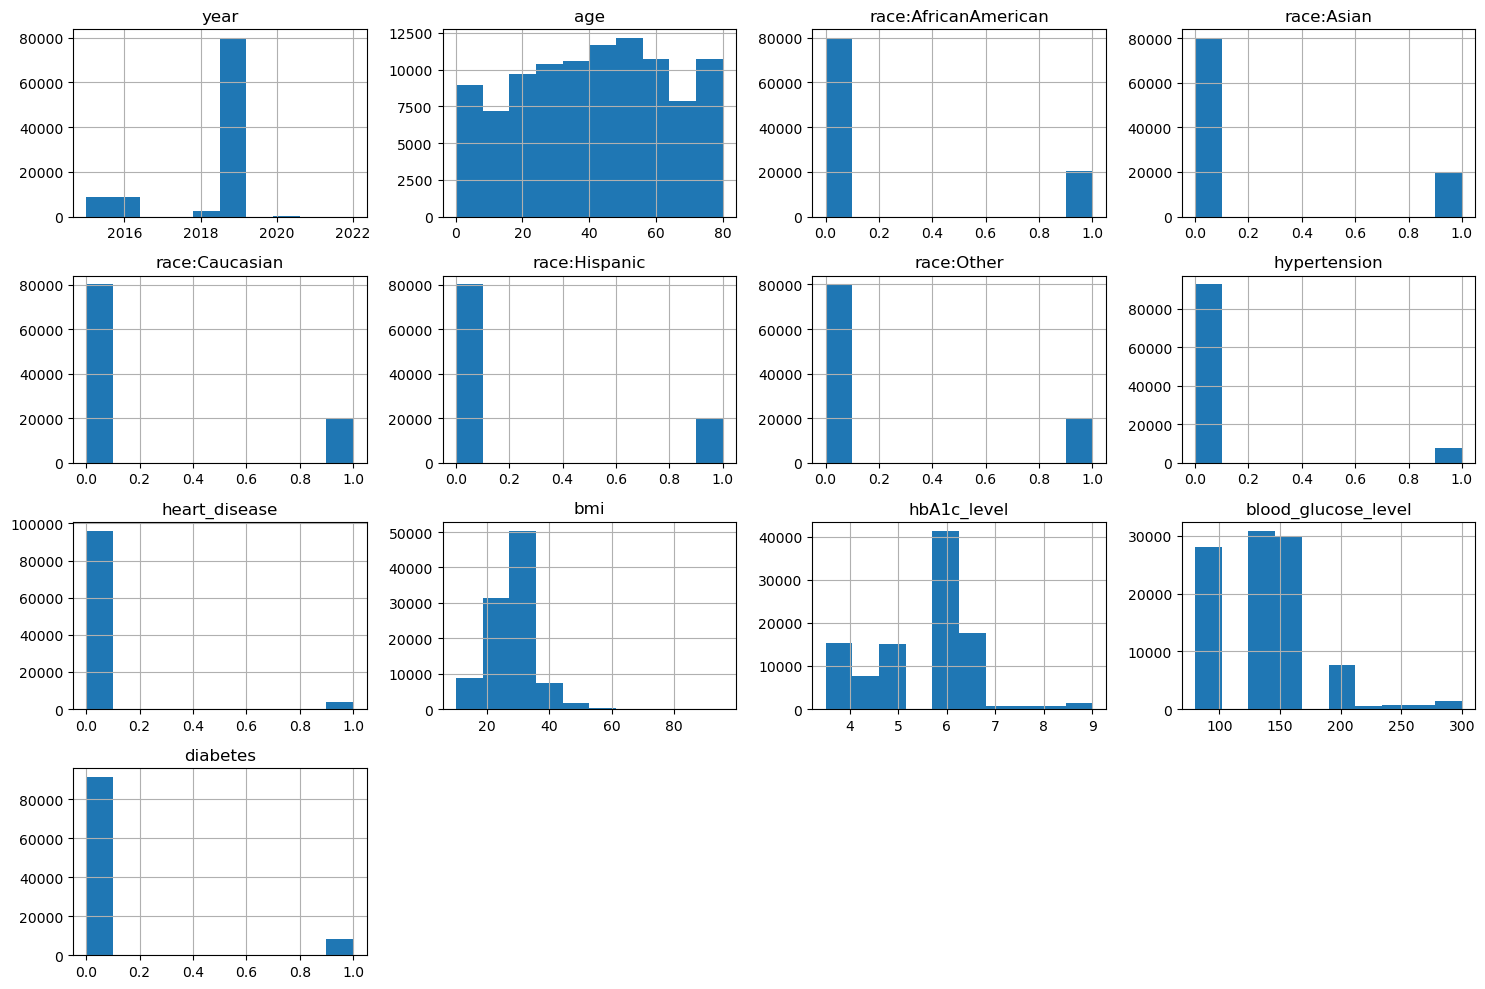

In [82]:
# Histogram and density graphs of all variables were accessed.
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

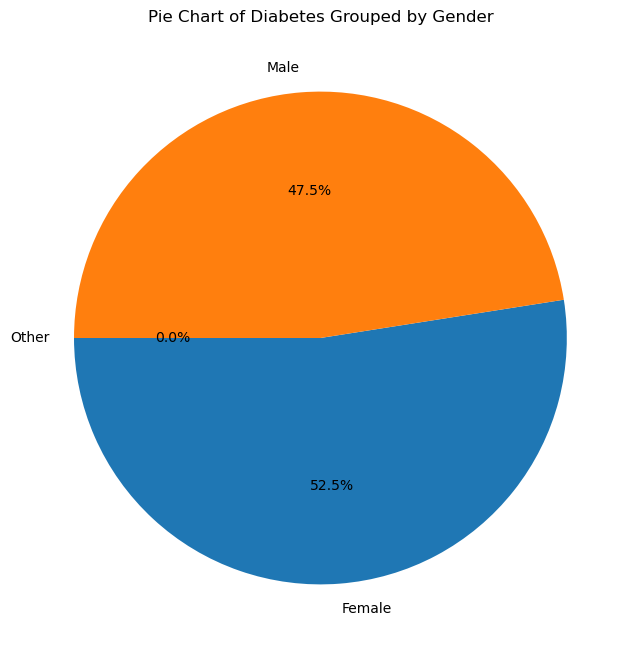

In [83]:
# Creating a piechart and grouping the data by its gender

df_gender_diabetes = df.groupby('gender')['diabetes'].sum()
plt.figure(figsize=(8, 8))
plt.pie(df_gender_diabetes, labels=df_gender_diabetes.index, autopct='%1.1f%%', startangle=180)
plt.title('Pie Chart of Diabetes Grouped by Gender')
plt.show()


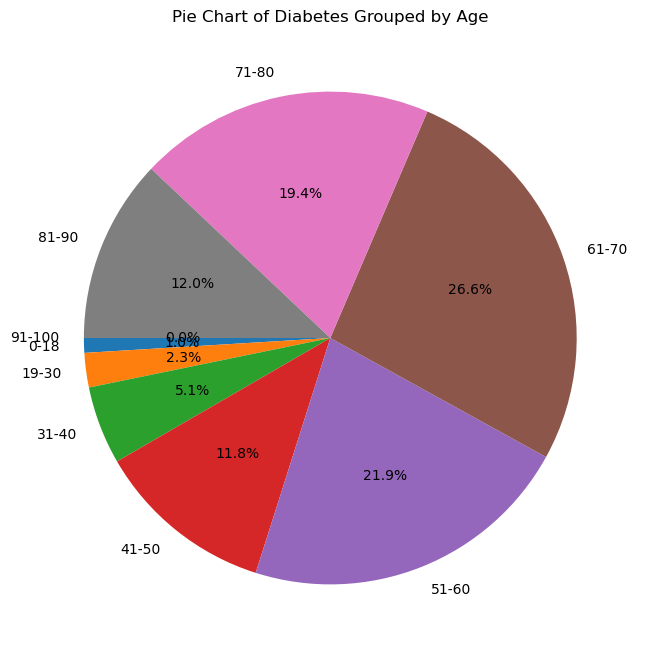

In [92]:
# Creating a piechart and grouping the data by its age range
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_new = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df_age_diabetes = df.groupby('age_range')['diabetes'].sum()
plt.figure(figsize=(8, 8))
plt.pie(df_age_diabetes, labels=df_age_diabetes.index, autopct='%1.1f%%', startangle=180)
plt.title('Pie Chart of Diabetes Grouped by Age')
plt.show()

In [61]:
# TODO: Create a scatter plot of the diabetes dataset
from shiny import App, render, ui

app_ui = ui.page_fluid(
    ui.h1('Diabetes Dataset'),
    ui.h2('Scatter Plot'),
    ui.div(id='scatter_plot'),
)

def server(input, output, session):
    @output
    @render.plot
    def scatter_plot():
        return sns.scatterplot(x='age', y='bmi', data=df, hue='diabetes')
    
    return locals()

app = App(app_ui, server)
    

In [85]:
# labeling gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99986 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   year                  99986 non-null  int64   
 1   gender                99986 non-null  object  
 2   age                   99986 non-null  float64 
 3   location              99986 non-null  object  
 4   race:AfricanAmerican  99986 non-null  int64   
 5   race:Asian            99986 non-null  int64   
 6   race:Caucasian        99986 non-null  int64   
 7   race:Hispanic         99986 non-null  int64   
 8   race:Other            99986 non-null  int64   
 9   hypertension          99986 non-null  int64   
 10  heart_disease         99986 non-null  int64   
 11  smoking_history       99986 non-null  object  
 12  bmi                   99986 non-null  float64 
 13  hbA1c_level           99986 non-null  float64 
 14  blood_glucose_level   99986 non-null  int64   
 15  diabete

In [87]:
df['gender']=le.fit_transform(df['gender'])
df['age']=le.fit_transform(df['age'])
df['location']=le.fit_transform(df['location'])
df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoking_history')

In [88]:
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,...,hbA1c_level,blood_glucose_level,diabetes,age_range,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,2020,0,53,0,0,0,0,0,1,0,...,5.0,100,0,31-40,False,False,False,False,True,False
1,2015,0,50,0,0,1,0,0,0,0,...,5.0,90,0,19-30,False,False,False,False,True,False
2,2015,1,39,0,0,0,0,0,1,0,...,4.8,160,0,19-30,False,False,False,False,True,False
3,2015,1,62,0,0,0,1,0,0,0,...,4.0,159,0,41-50,False,False,False,False,True,False
4,2016,0,73,0,1,0,0,0,0,0,...,6.5,90,0,51-60,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,0,54,54,0,0,0,0,1,0,...,6.5,90,0,31-40,False,False,False,False,True,False
99996,2016,0,101,54,0,1,0,0,0,0,...,5.7,100,0,81-90,True,False,False,False,False,False
99997,2018,1,67,54,0,1,0,0,0,0,...,6.2,158,0,41-50,False,False,True,False,False,False
99998,2018,0,72,54,1,0,0,0,0,0,...,6.0,155,0,51-60,False,False,False,False,False,True


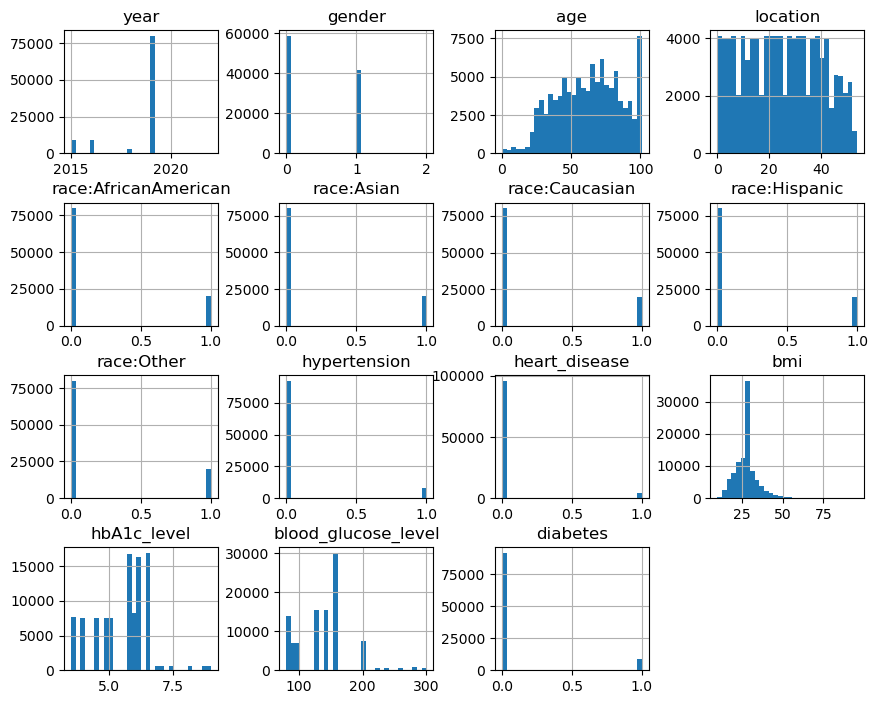

In [89]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])
df.hist(bins=30, figsize=(10, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=.4, hspace=0.4)
plt.show()

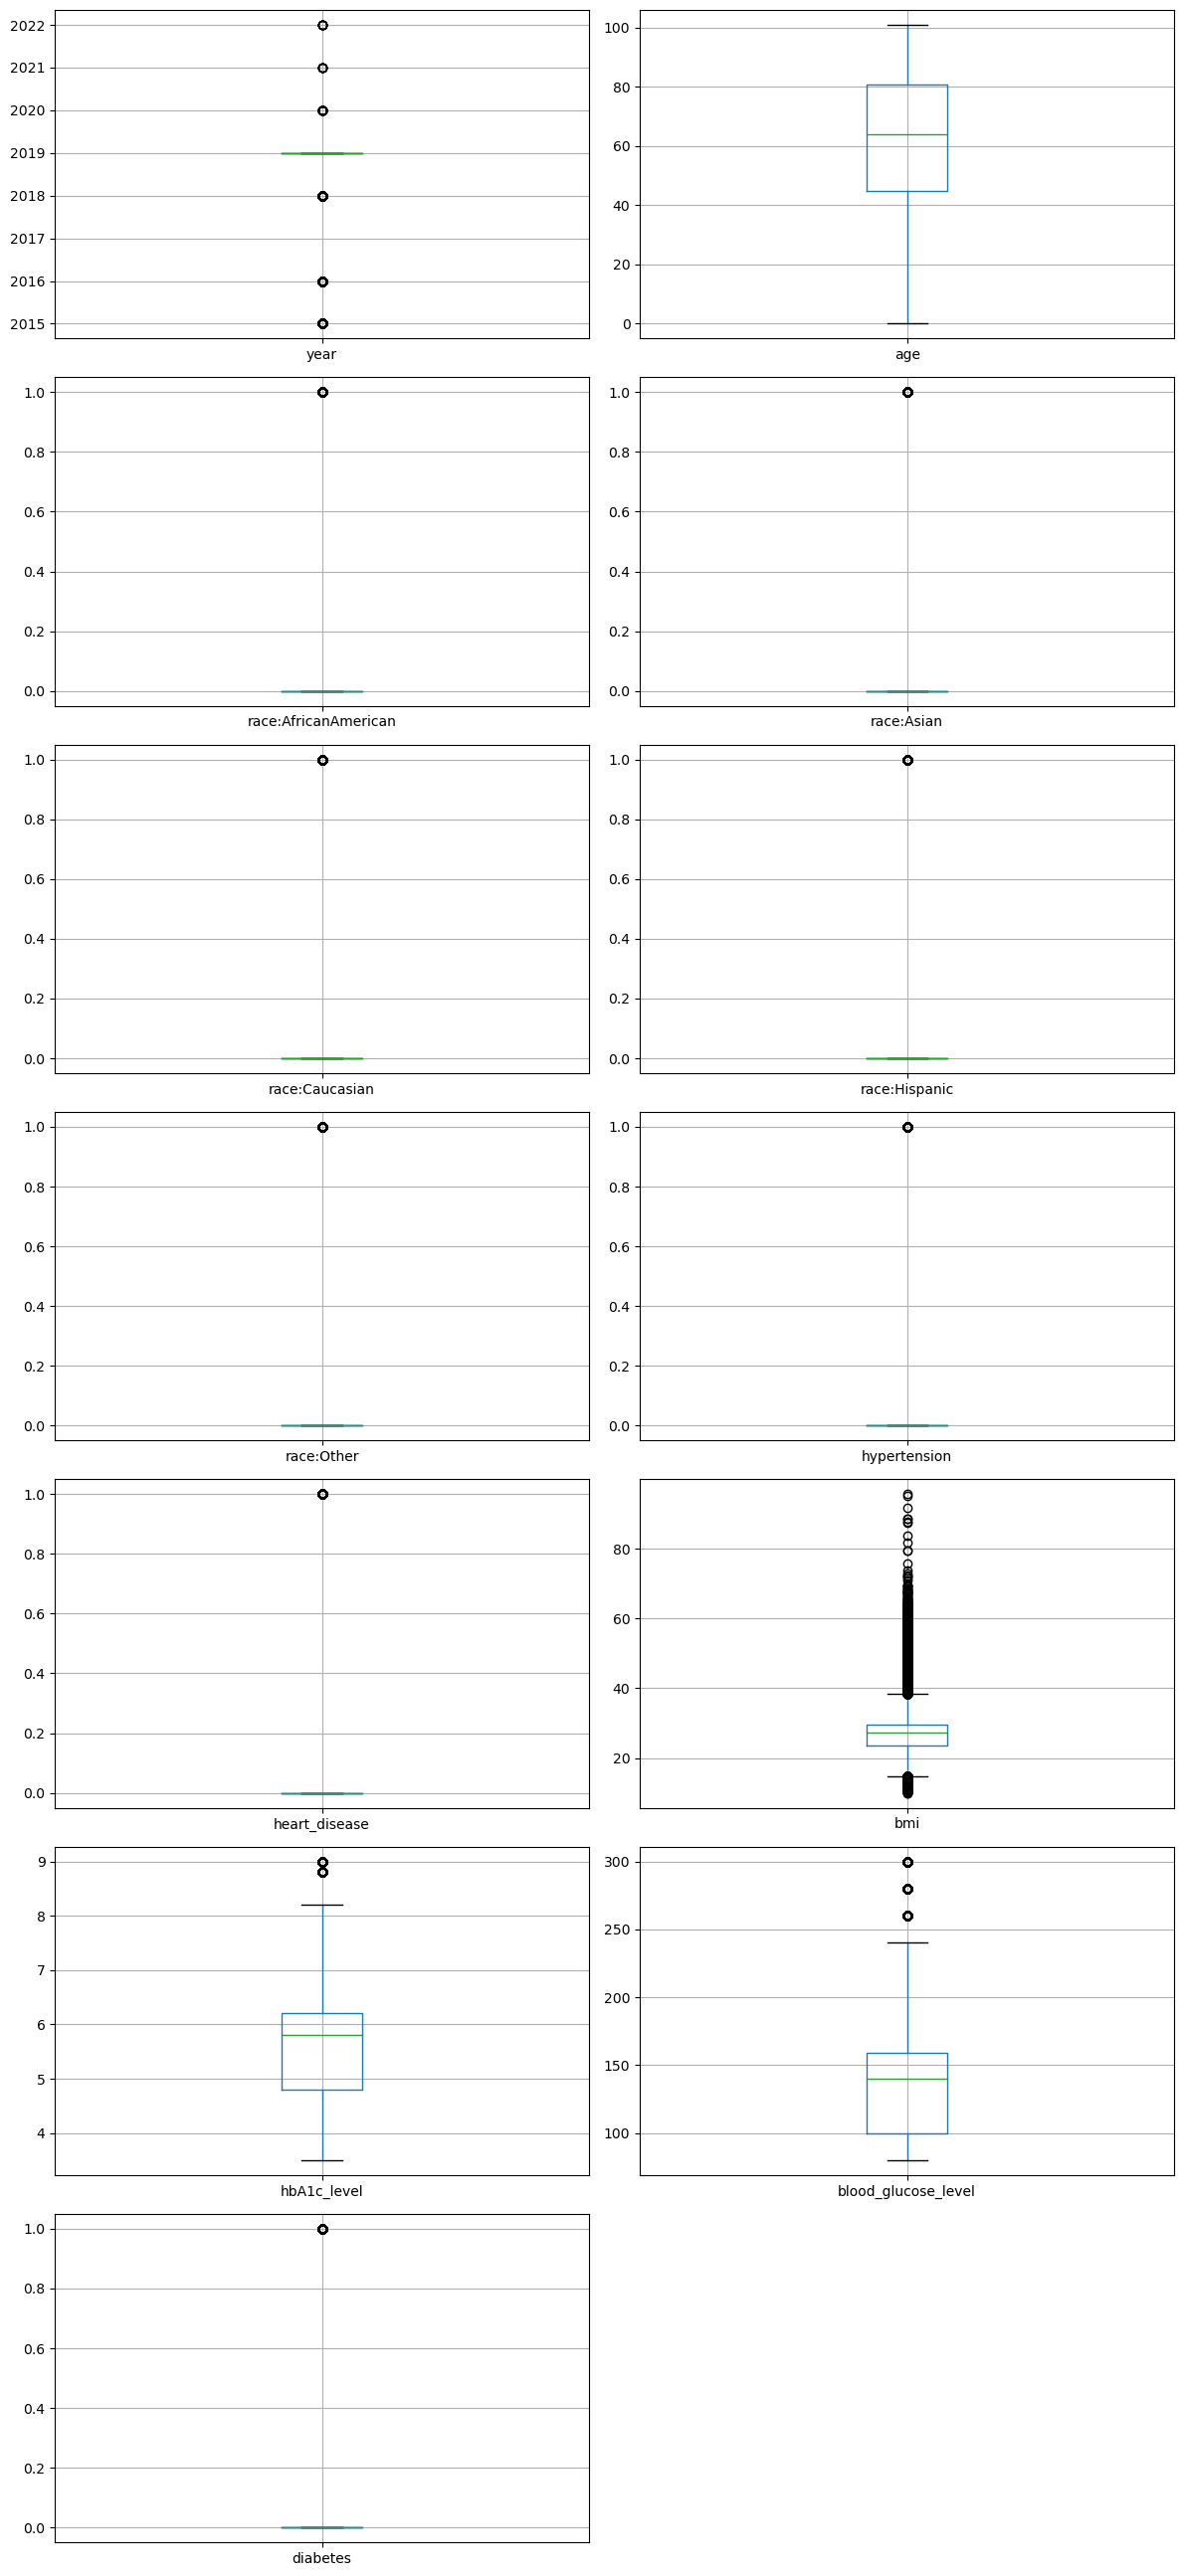

In [90]:
num_columns = len(df.select_dtypes(include=['int64', 'float64']).columns)

fig, axes = plt.subplots(nrows=(num_columns // 2 + num_columns % 2), ncols=2, figsize=(12, num_columns * 2))

axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    df.boxplot(column=col, ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

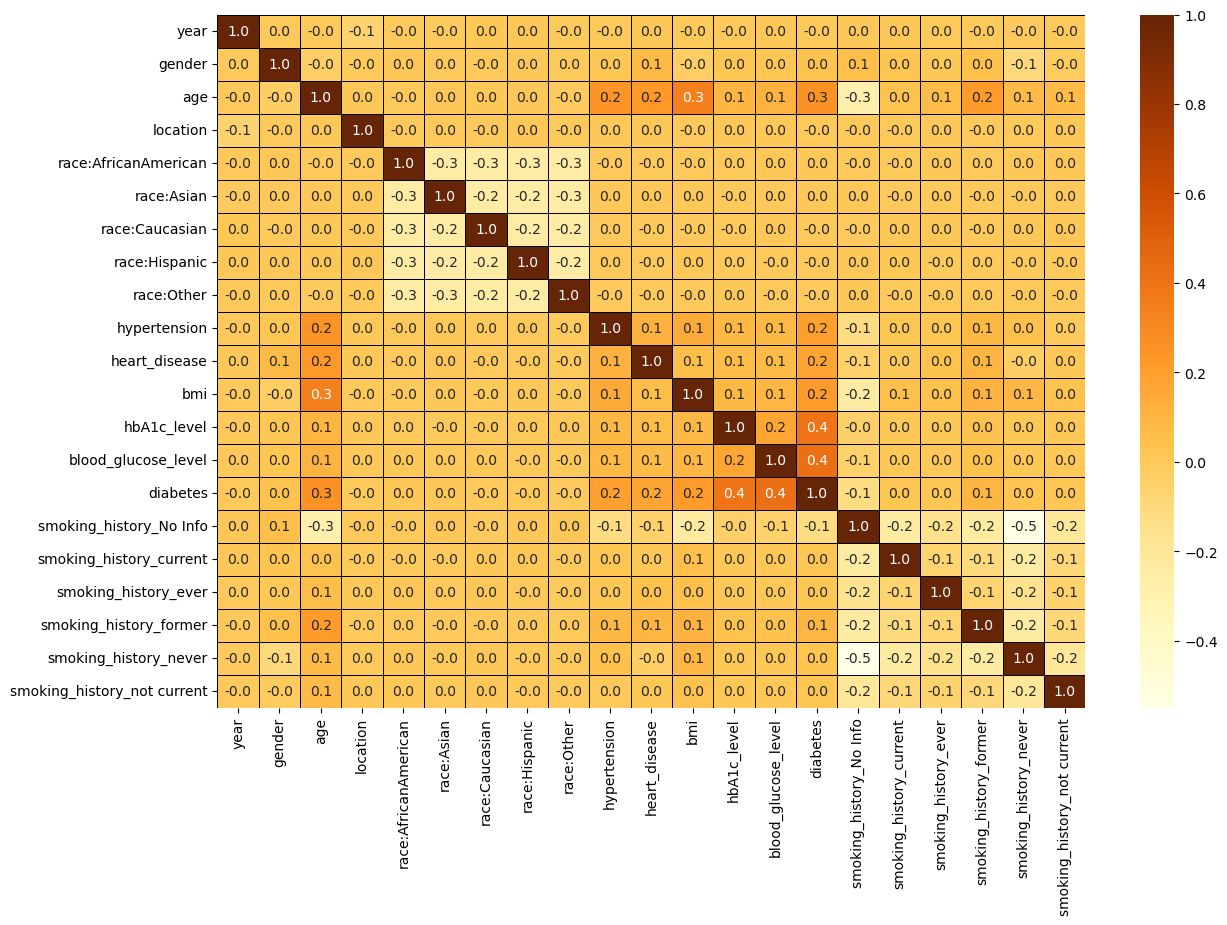

In [94]:
plt.figure(figsize=(14,9))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="YlOrBr",linewidths=0.6,fmt=".1f",linecolor="black")
plt.show()

In [95]:
corr_pairs=corr.unstack()
corr_pairs=corr_pairs[corr_pairs!=1].dropna()
corr_pairs=corr_pairs.sort_values(ascending=False)
top_correlated_pairs=corr_pairs.head(10)
low_correlated_pairs=corr_pairs.tail(10)
top_correlated_pairs

blood_glucose_level  diabetes               0.419574
diabetes             blood_glucose_level    0.419574
hbA1c_level          diabetes               0.400688
diabetes             hbA1c_level            0.400688
age                  bmi                    0.344493
bmi                  age                    0.344493
diabetes             age                    0.255819
age                  diabetes               0.255819
hypertension         age                    0.248926
age                  hypertension           0.248926
dtype: float64

In [96]:
low_correlated_pairs

race:AfricanAmerican     race:Hispanic             -0.250880
race:Hispanic            race:AfricanAmerican      -0.250880
race:Other               race:AfricanAmerican      -0.251754
race:AfricanAmerican     race:Other                -0.251754
                         race:Asian                -0.251825
race:Asian               race:AfricanAmerican      -0.251825
smoking_history_No Info  age                       -0.282861
age                      smoking_history_No Info   -0.282861
smoking_history_No Info  smoking_history_never     -0.549250
smoking_history_never    smoking_history_No Info   -0.549250
dtype: float64

## Feature Selection / Extraction

In [97]:
df_encoded = df.drop(columns = ["Age Group", "BMI Category"])
le = LabelEncoder()

df_encoded["Gender"] = le.fit_transform(df_encoded["Gender"])
df_encoded["Location"] = le.fit_transform(df_encoded["Location"])
df_encoded["Race"] = le.fit_transform(df_encoded["Race"])
df_encoded["Smoking History"] = le.fit_transform(df_encoded["Smoking History"])
df_encoded


y = df_encoded["Diabetes"].values

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size = 0.2, random_state = 42)
#scaler_X = StandardScaler()

#X_train_scaled = scaler_X.fit_transform(X_train)
#X_test_scaled = scaler_X.fit_transform(X_test)

NameError: name 'sample' is not defined

In [ ]:
import plotly.express as px
columns = ['hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']

outliers_dict = {}

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    outliers_dict[column] = outliers
    
    fig = px.box(df, y=column, title=f'Box Plot of {column} with Outliers')
    fig.show()

for column, outliers in outliers_dict.items():
    print(f"Outliers in {column}:")
    print(outlier)

In [ ]:
# extracting the features
X = df.drop(columns=['diabetes', 'year'])
y = df['diabetes']

In [ ]:
# Print the first 5 rows of the features
X.head()

,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,age_range
0,0,32.0,0,0,0,0,0,1,0,0,4,27.32,5.0,100,31-40
1,0,29.0,0,0,1,0,0,0,0,0,4,19.95,5.0,90,19-30
2,1,18.0,0,0,0,0,0,1,0,0,4,23.76,4.8,160,19-30
3,1,41.0,0,0,0,1,0,0,0,0,4,27.32,4.0,159,41-50
4,0,52.0,0,1,0,0,0,0,0,0,4,23.75,6.5,90,51-60


In [ ]:
# create a heatmap to show the correlation between the variables
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: '31-40'

<Figure size 1500x1000 with 0 Axes>

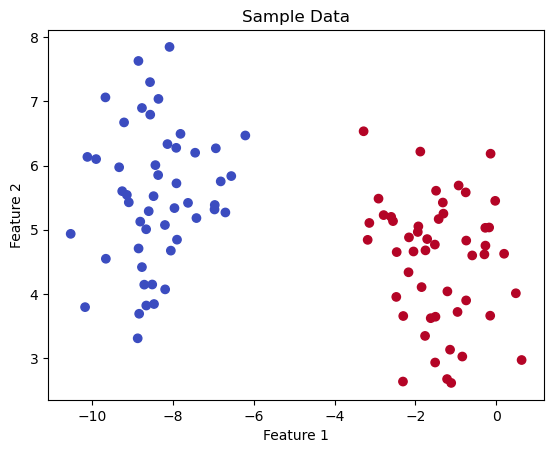

In [ ]:
# 
from sklearn.datasets import make_blobs, make_circles, make_moons

X, y = make_blobs(n_samples=100, centers=2, random_state=7)
#X, y = make_circles(n_samples=400, factor=.3, noise=.05)
#X, y = make_moons(n_samples=200, noise=0.05, random_state=2)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Sample Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

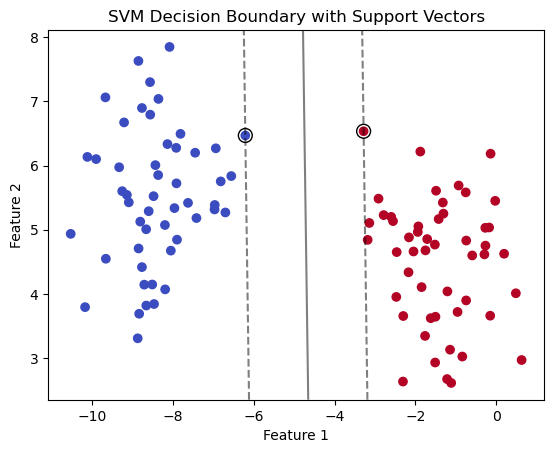

In [ ]:
def plot_svc_decision_function(model, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plotting the original data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("SVM Decision Boundary with Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot decision boundary
plot_svc_decision_function(model)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 2)
y_train shape: (80,)
X_test shape: (20, 2)
y_test shape: (20,)


In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_test,y_test)

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize the SVC model with probability=True
model = SVC(probability=True)
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC AUC (jika klasifikasi biner)
if len(set(y_test)) == 2:  # Pastikan ini klasifikasi biner
    y_proba = model.predict_proba(X_test)[:, 1]
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

ROC AUC Score: 1.0
Confusion Matrix:
 [[ 9  0]
 [ 0 11]]


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluasi model dengan cross-validation (k=5)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [ ]:
print("Distribusi target:\n", pd.Series(y).value_counts(normalize=True))


NameError: name 'pd' is not defined

In [1]:
pip install Jinja2


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
